In [3]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('project2.ok')

Assignment: Project 2: Diet and Disease
OK, version v1.12.5



# Project 2: Diet and Disease

In this project, you will investigate the major causes of death in the world, as well as how one of these causes, heart disease, might be linked to diet!

### Logistics


**Deadline.** This project is due at 11:59pm on Friday, 4/12. It's **much** better to be early than late, so start working now.

**Checkpoint.** For full credit, you must also complete the questions up until the end of Part 2 and submit them by 11:59pm on Friday, 4/5. You will have some lab time to work on these questions, but we recommend that you start the project before lab and leave time to finish the checkpoint afterward.

**Partners.** You may work with one other partner. Your partner must be enrolled in the same lab as you are. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/sp19/staff.html).

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, `plots`, and `ok`.

In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

from client.api.notebook import Notebook
ok = Notebook('project2.ok')
_ = ok.auth(inline=True)

Assignment: Project 2: Diet and Disease
OK, version v1.12.5


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: FXvspe0Ce7cMOC41S3tqrMvPqcsU1T
Successfully logged in as mingxiuhui@berkeley.edu


# Diet and Cardiovascular Disease

In the following analysis, we will investigate the world's most dangerous killer: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across two different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine a claim from the Nurses' Health Study that hormone replacement therapy reduces the risk of coronary heart disease for post-menopausal women.
* In Part 4, we'll run a hypothesis test on data based on the results of the Heart and Estrogen-Progestin Replacement Study.

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

In [23]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. This is so we can compare ages across years without worrying about changes in the demographics of our population.

**Question 1:** What are all the different causes of death in this dataset? Assign an array of all the unique causes of death to `all_unique_causes`.


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [24]:
all_unique_causes = causes_of_death.group("Cause").column(0)
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [41]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [25]:
# This function may be useful for Question 2.
def elem(x):
    return x.item(0)

**Question 2:** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use `pivot`, and think about how the `elem` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [26]:
causes_for_plotting = causes_of_death.pivot('Cause', 'Year', values = 'Age Adjusted Death Rate' ,collect = elem)

Run the cell below to see what a plot of the data would have looked like had you been living in 1950! CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.



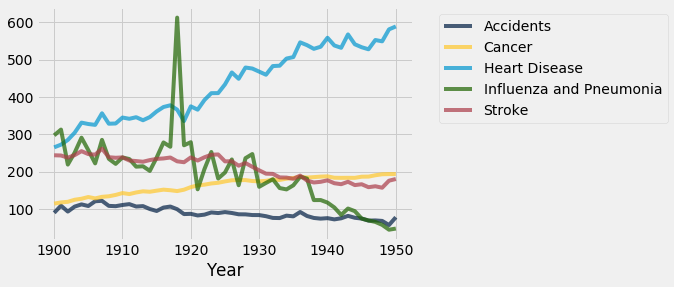

In [27]:
# Do not change this line
causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

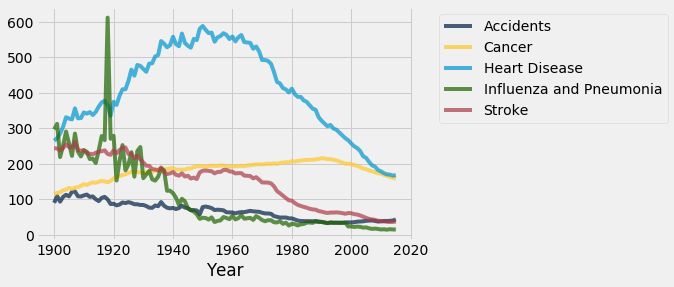

In [45]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of all other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.


## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [31]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalences to proportions before calculating the statistic!

<!--
BEGIN QUESTION
name: q2_1_1
manual: false
-->

In [32]:
observed_diabetes_distance = abs(framingham.where('DIABETES', are.equal_to(1)).num_rows/framingham.num_rows-0.0093)
observed_diabetes_distance

0.01802951587714732

In [33]:
ok.grade("q2_1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2**: Define the function `diabetes_statistic` which should return exactly one simulated statistic under the null hypothesis of the absolute distance between the observed prevalence and the true population prevalence.

<!--
BEGIN QUESTION
name: q2_1_2
manual: false
-->

In [34]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_statistic():
    simulated_stat = sample_proportions(framingham.num_rows, diabetes_proportions)
    return abs(simulated_stat.item(1)-0.0093)

**Question 3**: The array `diabetes_proportions` contains the proportions of the population without and with diabetes. Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q2_1_3
manual: false
-->

In [35]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    simulated_stat = diabetes_statistic()
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, simulated_stat)
    
diabetes_simulated_stats

array([ 0.00111124,  0.00163181,  0.00175185, ...,  0.00305325,
        0.00215237,  0.00019016])

In [36]:
ok.grade("q2_1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*Make sure to run the cell that draws the histogram, since it will be graded.*

<!--
BEGIN QUESTION
name: q2_1_4
manual: true
-->
<!-- EXPORT TO PDF -->

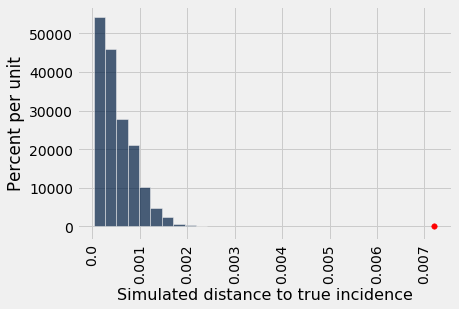

In [37]:
Table().with_column('Simulated distance to true incidence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=30);

**Question 5**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis?

<!--
BEGIN QUESTION
name: q2_1_5
manual: true
-->
<!-- EXPORT TO PDF -->

Based on the results of the test, we should reject the null hypothesis. 

**Question 6**: Why might there be a difference between the population and the sample from the Framingham Study? Assign the name `framingham_diabetes_explanations` to a list of the following explanations that **are possible and consistent** with the observed data and hypothesis test results.

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

<!--
BEGIN QUESTION
name: q2_1_6
manual: false
-->

In [38]:
framingham_diabetes_possibilities = [1,2,3]
framingham_diabetes_possibilities

[1, 2, 3]

In [39]:
ok.grade("q2_1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting all the data from the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels
among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

**Question 1:** From the provided Null and Alternative Hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

<!--
BEGIN QUESTION
name: q2_2_1
manual: false
-->

In [40]:
ab_reasonable = True
ab_reasonable

True

In [41]:
ok.grade("q2_2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

<!--
BEGIN QUESTION
name: q2_2_2
manual: true
-->
<!-- EXPORT TO PDF -->

The test statistic that I choose to use is the absolute distance between average cholesterol levels in those who have heart disease and those who do not because are dividing the people in the study into two groups: those that have heart disease and those that do not. Within those two groups, each person also has a cholesterol level so it would be a good idea to compare these two averages. 

**Question 3**: Write a function that computes your test statistic. It should take a table with two columns, `TOTCHOL` and `ANYCHD`, and compute the test statistic you described above. 

<!--
BEGIN QUESTION
name: q2_2_3
manual: false
-->

In [42]:
def compute_framingham_test_statistic(tbl):
    heart_disease = tbl.where('ANYCHD', are.equal_to(1))
    none = tbl.where('ANYCHD', are.equal_to(0))
    heart_disease_avg = sum(heart_disease.column('TOTCHOL'))/heart_disease.num_rows
    none_avg = sum(none.column('TOTCHOL'))/none.num_rows
    return abs(none_avg-heart_disease_avg)

In [43]:
ok.grade("q2_2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4**: Use the function you defined above to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

<!--
BEGIN QUESTION
name: q2_2_4
manual: false
-->

In [44]:
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [45]:
ok.grade("q2_2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 5**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

<!--
BEGIN QUESTION
name: q2_2_5
manual: false
-->

In [46]:
def simulate_framingham_null():
    shuffled_framingham = framingham.sample(with_replacement = False).column('TOTCHOL')
    framingham_og_and_shuffled = framingham.select('ANYCHD').with_column('TOTCHOL', shuffled_framingham)
    return compute_framingham_test_statistic(framingham_og_and_shuffled)
    

In [47]:
ok.grade("q2_2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [48]:
# Run your function once to make sure that it works.
simulate_framingham_null()

0.31954316858016796

**Question 6**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array framingham_simulated_stats.

*Hint*: You should use the function you wrote above in Question 3.

*Note*: Warning: running your code might take a few minutes!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q2_2_6
manual: false
-->

In [50]:
framingham_simulated_stats = make_array()

for i in np.arange(1000):
    simulated_stat = simulate_framingham_null()
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulated_stat)
    
framingham_simulated_stats

array([  8.91279320e-01,   1.88462197e-01,   1.11350662e-01,
         1.78513999e+00,   2.14310572e+00,   1.12792543e+00,
         4.06000830e-01,   2.28902071e-01,   3.85083654e-01,
         1.85863212e+00,   1.23390579e+00,   1.46719891e+00,
         2.22537994e+00,   4.46025482e-01,   1.02004536e-01,
         4.29706964e-01,   1.33472346e+00,   3.65560956e-01,
         1.70983815e+00,   3.78585283e-02,   1.68711127e+00,
         2.14542065e-01,   2.01012503e-01,   7.51416256e-01,
         3.29076145e+00,   2.07338180e+00,   1.79030268e+00,
         2.39642677e-01,   2.40707736e+00,   6.01227809e-01,
         8.73151100e-01,   1.66061618e+00,   1.13629230e+00,
         3.93450525e-01,   3.44554856e+00,   3.13179091e+00,
         3.21916903e-01,   4.68752359e-01,   1.89112034e+00,
         1.75404624e+00,   1.46212623e-01,   1.20085353e+00,
         3.50221694e-01,   7.58388648e-01,   1.02375477e+00,
         2.15467677e+00,   1.70983815e+00,   1.30543941e+00,
         3.31167863e+00,

**Question 7:** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

<!--
BEGIN QUESTION
name: q2_2_7
manual: true
-->
<!-- EXPORT TO PDF -->

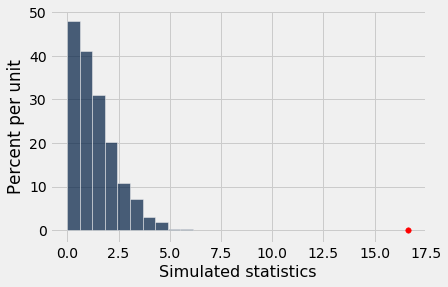

In [51]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30)

**Question 8**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

<!--
BEGIN QUESTION
name: q2_2_8
manual: false
-->

In [52]:
framingham_p_value = np.count_nonzero(framingham_observed_statistic <= framingham_simulated_stats)
framingham_p_value

0

In [53]:
ok.grade("q2_2_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9**: Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q2_2_9
manual: true
-->
<!-- EXPORT TO PDF -->

The Framingham Heart Study test subjects were not randomnly chosen; they volunteered and also lived in the same area. Because the subjects were not randomly selected, we are unable to concluded that high cholesterol is the cause behind heart disease but we are able to say there is a correlation. 

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

#### Congratulations, you have reached the checkpoint! Run the submit cell below to generate the checkpoint submission.

In [54]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project2.ipynb'.
Submit... 100% complete
Submission successful for user: mingxiuhui@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/project2/submissions/Qnj34Z



## Part 3: The Nurses' Health Study and Hormone Replacement Therapy

The Nurses' Health Study (NHS) is another very large observational study which has brought many insights into women's health. It was begun in 1976 by Dr. Frank Speizer, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, and so on (one of the benefits of studying nurses is their ability to give reliably accurate answers to these questions). The study's initial focus was on investigating the long-term health effects of oral contraceptives, whose use had become much more widespread in the U.S. during the 1960s, but the focus soon expanded to investigating a wide variety of questions on women's health. The NHS continues to this day, tracking its third generation of nurses in the US.

One of the most consequential early findings from the NHS was about hormone replacement therapy (HRT): supplementary estrogen and progesterone for post-menopausal women to relieve side effects of declining hormone levels due to menopause. The NHS found that HRT in postmenopausal women was negatively associated with heart attack risk. In a landmark 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)

In other words, the authors are saying that women on HRT are half as likely to suffer a heart attack over a certain time period. We'll define the term "relative risk" later in this section, and we'll also investigate the interpretation of these claims and their statistical basis.

**Question 1.** The block quote above is a direct quote from the 1985 article's abstract. Do you find any of the claims to be suspect? If so, why?

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->
<!-- EXPORT TO PDF -->

Because the study is not randomized (the study was only mailed to female registered nurses), I believe that the claim that woman who are on HTF are half as like to suffer a heart attack because nurses have more access to health care and doctors and they are not representative of all women in the united states. 

The scientists running the NHS wanted to compare post-menopausal women who had ever taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had already suffered a heart attack. This study design complicates the analysis because it creates a variety of reasons why women might drop in and out of the relevant comparison groups.

**Question 2.** Consider the following events which could occur in the middle of the study period (read the above paragraph carefully first): 
0. A woman who was pre-menopausal at the beginning of the study period becomes post-menopausal in the middle of the study period.
1. A post-menopausal woman survives a heart attack in the middle of the study period (assume the woman is post-menopausal and had never before had a heart attack).
2. A woman dies of cancer in the middle of the study period (assume the woman is post-menopausal and has never had a heart attack).
3. A woman who was not on HRT at the beginning of the study period, and had never before taken HRT, begins taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).
4. A woman who was taking HRT at the beginning of the study period stops taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).

For each of the events listed above, answer whether they would result in a woman

- (`E`) entering the study in the middle, 
- (`L`) leaving the study in the middle, 
- (`S`) switching from one comparison group to another in the middle, or 
- (`N`) none of the above 

<!--
BEGIN QUESTION
name: q3_2
-->

Assign `event_result` to a list of strings where the *i*th string is a single *capital* letter corresponding to your answer for the *i*th event.

For example, an example answer is `event_result = ['N', 'E', 'E', 'L', 'E']` where our answer for event 0 is `N`, our answer for event 1 is `E`, our answer for event 2 is ``, etc.

In [55]:
event_result = ['E', 'L', 'L', 'S', 'N']

In [56]:
ok.grade("q3_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Because women could (and did) drop into and out of the comparison groups in the middle of the study, it is difficult to make a table like we usually would, with one row per participant. A more convenient sampling unit is a **person-month at risk**, which is one month spent by a particular woman in one of the comparison groups, during which she might or might not suffer a heart attack. Here, "at risk" just means the woman is being tracked by the survey in either of the two comparison groups, so that if she had a heart attack it would be counted in our data set.

**Example**: The table below tracks the histories of two hypothetical post-menopausal women in a six-month longitudinal study, who both enter the study in January 1978:
1. Alice has never been on HRT. She has a heart attack in March and is excluded for the remainder of the study period. 
2. Beatrice begins taking HRT for the first time in April and stays healthy throughout the study period.

| Name     | Month    | HRT | Heart Attack   |                                             
|----------|----------|-----|----------------|
| Alice    | Jan 1978 |  0  | 0              |
| Alice    | Feb 1978 |  0  | 0              |
| Alice    | Mar 1978 |  0  | 1              |
| Beatrice | Jan 1978 |  0  | 0              | 
| Beatrice | Feb 1978 |  0  | 0              |
| Beatrice | Mar 1978 |  0  | 0              |
| Beatrice | Apr 1978 |  1  | 0              |
| Beatrice | May 1978 |  1  | 0              |
| Beatrice | Jun 1978 |  1  | 0              |



The probability that a heart attack will happen to a given at-risk person in a given duration of time is called the **hazard rate**. The NHS calculated its effects in terms of the **relative risk**, which is simply the hazard rate for person-months in the HRT (Group A) group divided by the hazard rate in the no-HRT (Group B) group.

**Question 3.** Suppose the hazard rate for the no-HRT group is 0.1% per month and the relative risk is 50%. Assign `hrt_no_ha` to the probability that a given woman who is taking HRT will have no heart attacks for the entire four years of the study period.

Assign `no_hrt_no_ha` to the probability that a woman who is not taking HRT will have no heart attacks for the entire four years of the study period.

<!--
BEGIN QUESTION
name: q3_3
-->

In [57]:
hrt_no_ha = (1-.0005)**48
no_hrt_no_ha = (1-.001)**48

In [58]:
ok.grade("q3_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Most statistical methods that deal with this type of data assume that we can treat a table like the one above as though it is a sample of independent random draws from a much larger population of person-months at risk in each group. We will take this assumption for granted throughout the rest of this project.

**Question 4.** The abstract quoted above gives a 95% confidence interval of [0.3, 0.8] for the relative risk. Which of the following statements can be justified based on that confidence interval?
1. There is a 95% chance the relative risk is between 0.3 and 0.8.
2. If we used a P-value cutoff of 5%, we would reject the hypothesis that the relative risk is equal to 1.
3. If we redo the procedure that generated the interval [0.3, 0.8] on a fresh sample of the same size, there is a 95% chance it will include the true relative risk.
4. There is between a 30% and 80% chance that any woman will suffer a heart attack during the study period.

Assign `ci_statements` to a list of number(s) corresponding to the correct answer(s).

<!--
BEGIN QUESTION
name: q3_4
-->

In [59]:
ci_statements = [1,2,3]

In [60]:
ok.grade("q3_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Instead of *person-months* at risk, the NHS used *person-years* at risk. It reported 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. The table NHS below has one row for each person-year at risk. The two columns are 'HRT', recording whether it came from the HRT group (1) or no-HRT group (0), and 'Heart Attack', recording whether the participant had a heart attack that year (1 for yes, 0 for no).

In [61]:
NHS = Table.read_table('NHS.csv')
NHS.show(3)

HRT,Heart Attack
0,0
0,0
0,0


**Question 5.** Fill in the missing code below to write a function called `relative_risk` that takes in a table with the column labels `HRT` and `Heart Attack`, and computes the sample relative risk as an estimate of the population relative risk. Do *not* round your answer.

<!--
BEGIN QUESTION
name: q3_5
-->

In [62]:
def relative_risk(tbl):
    """Return the ratio of the hazard rates (events per person-year) for the two groups"""
    HRT = tbl.where('HRT', are.equal_to(1))
    No_HRT = tbl.where('HRT', are.equal_to(0))
    HRT_ratio = HRT.where('Heart Attack', are.equal_to(1)).num_rows/HRT.num_rows
    No_HRT_ratio = No_HRT.where('Heart Attack', are.equal_to(1)).num_rows /No_HRT.num_rows
    return HRT_ratio/No_HRT_ratio
    
relative_risk(NHS)

0.47393618000699694

In [63]:
ok.grade("q3_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Fill in the function `one_bootstrap_rr` so that it generates one bootstrap sample and computes the relative risk. Assign `bootstrap_rrs` to 10 (yes, only 10; the code is slow!) estimates of the population relative risk.

*Note:* The cell may take a few seconds to run.

<!--
BEGIN QUESTION
name: q3_6
-->

In [64]:
def one_bootstrap_rr():
    return relative_risk(NHS.sample())

bootstrap_rrs = make_array()
for i in np.arange(10):
    new_bootstrap_rr = one_bootstrap_rr()
    bootstrap_rrs = np.append(bootstrap_rrs, new_bootstrap_rr)

In [65]:
ok.grade("q3_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** The file `bootstrap_rrs.csv` contains a table with 2001 saved bootstrapped relative risks. Use these bootstrapped values to compute a 95% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`. 

Note that our method isn't exactly the same as the method employed by the study authors to get their confidence interval.

<!--
BEGIN QUESTION
name: q3_7
-->

In [66]:
bootstrap_rrs_tbl = Table.read_table('bootstrap_rrs.csv')
bootstrap_rrs_array = bootstrap_rrs_tbl.column(0)
ci_left = percentile(2.5, bootstrap_rrs_array)
ci_right = percentile(97.5, bootstrap_rrs_array)

print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.295930, 0.730383]


In [67]:
ok.grade("q3_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The code below plots the confidence interval on top of the bootstrap histogram.

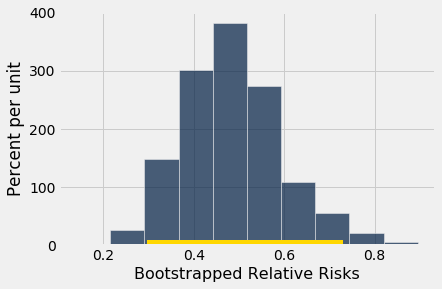

In [68]:
# Just run this cell
bootstrap_rrs_tbl.hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold");

## Part 4: The Heart and Estrogen-Progestin Replacement Study

Partly as a result of evidence from the NHS and other observational studies that drew similar conclusions, HRT drugs became a very popular preventive treatment for doctors to prescribe to post-menopausal woman. Even though there were known or suspected risks to the treatment (such as increasing the risk of invasive breast cancer), it was thought that the reduction in heart disease risk was well worth it.

The Heart and Estrogen-Progestin Replacement Study (HERS) was a large randomized controlled trial carried out by the Women's Health Initiative, which sought to verify whether HRT drugs were as effective as the observational studies seemed to suggest. 2,763 women with a history of heart disease were selected and randomly assigned to receive the treatment (daily estrogen pills) or a placebo pill that looked identical to the treatment. Of the 2763 women participating, 1380 were assigned to the treatment condition and 1383 to the control. They were followed for an average of three years and the number of heart attacks in the two groups was compared.

The main results table from the HERS study [Hulley et al. (1998)](https://jamanetwork.com/journals/jama/fullarticle/187879) is reproduced here:

<img src="HERS-table.png" width=500>

**Question 1**: For this study, we will construct our own table from scratch based on the results given above. Create a table called `HERS` that has one row for each woman in the trial and two columns: `HRT`, which is 1 if she was assigned to treatment and 0 otherwise, and `CHD`, which is 1 if she suffered a Primary CHD (Coronary Heart Disease) event and 0 otherwise.

*Hint*: Remember what the functions `np.ones` and `np.zeros` do. They may be helpful here!

<!--
BEGIN QUESTION
name: q4_1
-->

In [69]:
num_control = np.zeros(1383)
num_treatment = np.ones(1380)

num_control_chd = np.ones(176)
num_treatment_chd = np.ones(172)

hrt = np.append(num_control, num_treatment)
chd_control = np.append(np.zeros(1383-176),num_control_chd)
chd_treatment = np.append(np.zeros(1380-172),num_treatment_chd)
chd = np.append(chd_control, chd_treatment)

HERS = Table().with_columns('HRT', hrt, 'CHD', chd)
HERS.show(3)

HRT,CHD
0,0
0,0
0,0


In [70]:
ok.grade("q4_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Make a pivot table called `HERS_pivot` where each unique `CHD` value has its own row and each unique `HRT` value has its own column. Check that you have the right number of each combination of the two columns. 

<!--
BEGIN QUESTION
name: q4_2
-->

In [71]:
HERS_pivot = HERS.pivot('HRT', 'CHD')
HERS_pivot

CHD,0.0,1.0
0,1207,1208
1,176,172


In [72]:
ok.grade("q4_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 0
[k..........] 0.0% passed



**Question 3.** We would like to test the null hypothesis that the treatment (HRT) has no effect on the outcome (CHD), against the alternative hypothesis that the treatment does have an effect. What would be a good test statistic? 

Assign `good_ts` to a list of number(s) corresponding to the correct answer(s). Keep in mind that this was the first clinical trial to be done on this subject; as a result, it was not clear at the time whether any effect would be positive or negative.


1. The absolute difference between 1 and the relative risk.
2. The average CHD rate for the treatment group.
3. 10 times the absolute difference between the control and treatment groups' average CHD rates.

<!--
BEGIN QUESTION
name: q4_3
-->

In [73]:
good_ts = [1,3]

In [74]:
ok.grade("q4_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** We'll use distance between average CHD rates as our test statistic. 

Write a function called `hers_test_statistic` to calculate this test statistic on a table with columns `HRT` and `CHD`. Use this function to calculate the observed test statistic, and assign it to `observed_HERS_test_statistic`.

Think about what values of the test statistic support the null versus the alternative hypothesis. You'll use this information to compute the p-value later in this section.
<!--
BEGIN QUESTION
name: q4_4
-->

In [75]:
def HERS_test_statistic(tbl):
    """Test statistic: Distance between the average responses"""
    pivoted = tbl.pivot('HRT', 'CHD')
    no_hrt = pivoted.column(1)
    hrt = pivoted.column(2)
    no_hrt_rate = no_hrt.item(1)/ 1383
    hrt_rate = hrt.item(1)/1380
    return abs(no_hrt_rate-hrt_rate)
    


observed_HERS_test_statistic = HERS_test_statistic(HERS)
observed_HERS_test_statistic

0.0026218994624162967

In [76]:
ok.grade("q4_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Write a function called `simulate_one_HERS_statistic` to simulate one value of the test statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q4_5
-->

In [77]:
def simulate_one_HERS_statistic():
    HERS_shuffled = HERS.select('HRT').sample(with_replacement = False).column(0)
    HERS_shuffled_and_og = HERS.select('CHD').with_columns('HRT', HERS_shuffled)
    return HERS_test_statistic(HERS_shuffled_and_og)
    

simulate_one_HERS_statistic()

0.0002735074978779395

In [78]:
ok.grade("q4_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Write a `for` loop to repeatedly sample the null hypothesis 1000 times and compute the test statistic each time. The cell may take a few seconds to run.


<!--
BEGIN QUESTION
name: q4_6
-->

In [79]:
HERS_test_statistics = make_array()
for i in np.arange(1000):
    new_HERS_statistic = simulate_one_HERS_statistic()
    HERS_test_statistics = np.append(HERS_test_statistics, new_HERS_statistic)

In [80]:
ok.grade("q4_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The code below generates a histogram of the simulated test statistics along with your test statistic:

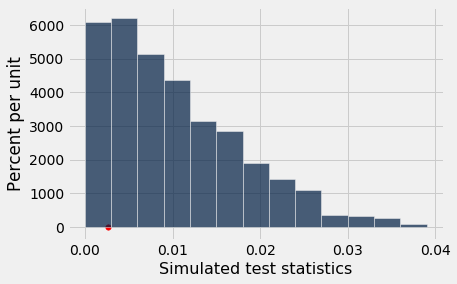

In [81]:
Table().with_column('Simulated test statistics', HERS_test_statistics).hist(bins=np.arange(0,.04,.003))
plots.scatter(HERS_test_statistic(HERS), 0, color='red', s=30);

**Question 7.** Compute the P-value for your hypothesis test and assign it to `HERS_pval`. 

<!--
BEGIN QUESTION
name: q4_7
-->

In [84]:
HERS_pval = np.count_nonzero(observed_HERS_test_statistic<=HERS_test_statistics)/1000
HERS_pval

0.864

In [85]:
ok.grade("q4_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 0
[k..........] 0.0% passed



**Question 8.** Are the data consistent with the null hypothesis being true?

<!--
BEGIN QUESTION
name: q4_7
manual: true
-->
<!-- EXPORT TO PDF -->

The data is in fact consistent with the null hypothesis being true. 

In part 3, we gave you 2001 bootstrapped relative risks. In the context of the HERS trial, relative risk is now defined as the ratio of the probability that a given woman in the treatment group will have CHD over the study period divided by the probability that a given woman in the control group will have CHD over the study period.

We plot the histogram of bootstrapped relative risks, along with a confidence interval representing the middle 95% of that histogram:
<img src="bootstrap-HERS.png" width=400>

A relative risk of 1 means that the probability of CHD is the same for both the treatment and control groups, which would correspond to the treatment having no effect. Note that 1 is right in the middle of the interval.

**Question 9.** Based on the results for this experiment, can we conclude that HRT is not actually protective against heart disease risk? Explain why or why not.

<!--
BEGIN QUESTION
name: q4_9
manual: true
-->
<!-- EXPORT TO PDF -->

Based on the results for this experiement, we cannot reject the null that HRT is not actually protective against heart disease risk in those with a history of heart disease. By using the bootstrap method which captures the true parameter 95% of the time and the relative risk of 1 being our null is true, we can see from the bootstrap histogram that 1 is right in the center, so we cannot reject our null hypothesis. 

**Question 10:** The HERS study authors put forward a possible answer regarding why the NHS study might be biased:
> However, the observed association between estrogen therapy and reduced CHD risk might be attributable to selection bias if women who choose to take hormones are healthier and have a more favorable CHD profile than those who do not. Observational studies cannot resolve this uncertainty.

If women who choose to take hormones are healthier to begin with than women who choose not to, why might that systematically bias the results of observational studies like the NHS? Would we expect observational studies to overestimate or underestimate the protective effect of HRT?

<!--
BEGIN QUESTION
name: q4_10
manual: true
-->
<!-- EXPORT TO PDF -->

CHD can also be caused by an unhealthy lifestyle so if women who choose to take the hormones are generally healthier than those that do not, then that may systematically bias observational studies such as NHS because those studies do not account for other factors such as lifestyle. This means that the observational study would overestimate the positive effect of HRT. 

Congratulations! You have completed your own large scale case study into cause and effect surrounding one of the world's deadliest killers: cardiovascular disease. Your investigation you has taken you through two important data sets and across decades of medical research.

Run the next two cells to run all the tests at once and submit the project. 

In [86]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project2.ipynb'.
Submit... 100% complete
Submission successful for user: mingxiuhui@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/project2/submissions/q76Pzk



### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [NYT article on the Nurses' Health Study and the HERS study](https://www.nytimes.com/2003/04/22/science/hormone-studies-what-went-wrong.html)

In [87]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 0
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tes